<a href="https://colab.research.google.com/github/tutruongmaster/Computer_Vision/blob/main/Image_Pyramids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Họ và Tên: <b>Nguyễn Trung Trí</b> <br>
MSSV: 19000131<br>
Lớp: CHKHMT9A<br>
<center><b>Tên đề tài:</b> <br><b><div style="color:#00C; font-size:24px">Image Pyramids (Hình ảnh Kim tự tháp)</div></b></center><br>
<b>Mục tiêu:</b><br>
<ul>
    <li>Chúng ta sẽ nghiên cứu cách hoạt động hình thái học khác nhau như
    </li>
    <li>Chúng ta sẽ sử dụng các Image Pyramids để tạo ra một loại new fruit, "Orapple"
    </li>
    <li>Chúng ta sẽ sử dụng các hàm này: <b>cv2.pyrUp (), cv2.pyrDown ()</b>
    </li>
</ul><br>
<b>Học thuyết:</b><br>
<div align="justify">Thông thường, chúng ta từng làm việc với một hình ảnh có kích thước không đổi. Nhưng trong một số trường hợp, chúng ta cần làm việc với các hình ảnh có độ phân giải khác nhau của cùng một hình ảnh. Ví dụ: trong khi tìm kiếm thứ gì đó trong hình ảnh, chẳng hạn như khuôn mặt, chúng tôi không chắc đối tượng sẽ hiện diện trong hình ảnh ở kích thước nào. Trong trường hợp đó, chúng ta sẽ cần tạo một tập hợp các ảnh có độ phân giải khác nhau và tìm kiếm đối tượng trong tất cả các ảnh. Tập hợp các hình ảnh có độ phân giải khác nhau này được gọi là Hình ảnh Kim tự tháp (vì khi chúng được giữ trong một chồng với hình ảnh lớn nhất ở dưới cùng và hình ảnh nhỏ nhất ở trên cùng trông giống như một kim tự tháp).</div><br>
Có hai loại Kim tự tháp hình ảnh. <br><b>1) Kim tự tháp Gauss và <br>2) Kim tự tháp Laplacian<br></b><br>
<div align="justify">Mức độ cao hơn (độ phân giải thấp) trong Kim tự tháp Gaussian được hình thành bằng cách loại bỏ các hàng và cột liên tiếp trong hình ảnh mức thấp hơn (độ phân giải cao hơn). Sau đó, mỗi pixel ở cấp cao hơn được hình thành bởi sự đóng góp từ 5 pixel ở cấp cơ bản với trọng số gaussian. Làm như vậy, ảnh <span style="color:#00F; font-size:14px; font-weight:bold">MxN</span> trở thành ảnh <span style="color:#00F; font-size:14px; font-weight:bold">M/2xN/2</span>. Vì vậy, diện tích giảm xuống còn một phần tư diện tích ban đầu. Nó được gọi là Octave. Mô hình tương tự tiếp tục khi chúng ta đi lên trên trong kim tự tháp (nghĩa là, độ phân giải giảm). Tương tự trong khi mở rộng, diện tích tăng gấp 4 lần ở mỗi cấp độ. Chúng ta có thể tìm thấy các kim tự tháp Gaussian bằng cách sử dụng các hàm <b>cv2.pyrDown()</b> và <b>cv2.pyrUp()</b>.</div>


<b>Lưu ý: Update conda</b><br>
1. pip install opencv-python
2. conda update anaconda-navigator  
3. conda update navigator-updater 
4. conda install -c conda-forge opencv

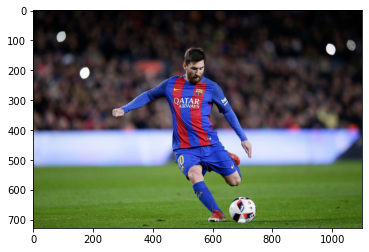

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('messi.jpg') 
#plt.imshow(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


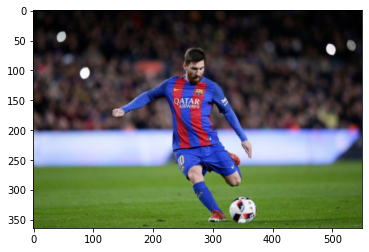

In [ ]:
lower_reso = cv2.pyrDown(img)
plt.imshow(cv2.cvtColor(lower_reso, cv2.COLOR_BGR2RGB))
plt.show()

Sau lần <b>thứ nhất</b>, Diện tích ảnh sẽ giảm đi gấp <b>04</b> lần

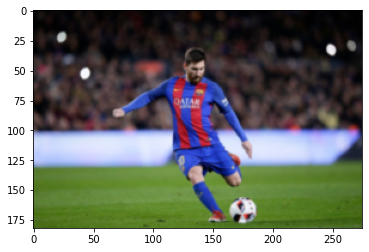

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('messi.jpg') 
lower_reso = cv2.pyrDown(img) #Giảm lần 1
lower_reso2 = cv2.pyrDown(lower_reso) #Giảm lần 2
plt.imshow(cv2.cvtColor(lower_reso2, cv2.COLOR_BGR2RGB))
plt.show()

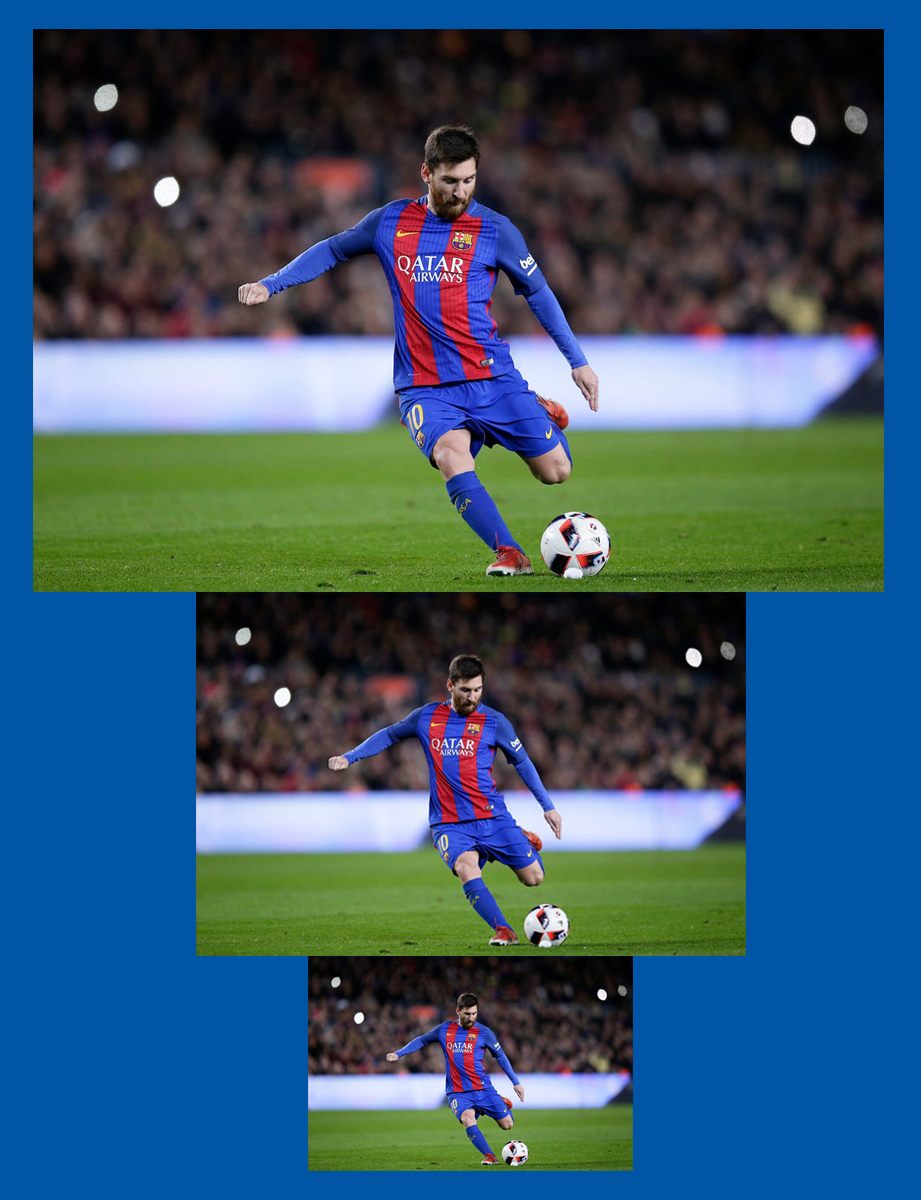<img src="messi2.jpg"/>

Sau lần <b>thứ hai</b>, Diện tích ảnh sẽ giảm đi gấp <b>04 lần thứ nhất</b>. Có nghĩa giảm <b>16 lần</b> so với ảnh gốc.<br>
Bây giờ chúng có thể đi xuống hình chóp bằng hàm <b>cv2.pyrUp()</b>.

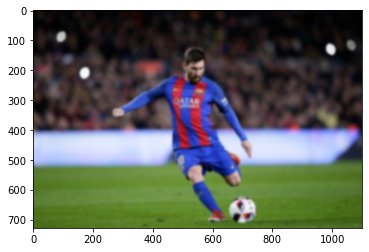

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('messi.jpg') 
lower_reso = cv2.pyrDown(img)
lower_reso2 = cv2.pyrDown(lower_reso)
higher_reso = cv2.pyrUp(lower_reso2) # Tăng lần thứ nhất
higher_reso2 = cv2.pyrUp(higher_reso) # Tăng lần thứ hai
plt.imshow(cv2.cvtColor(higher_reso2, cv2.COLOR_BGR2RGB))
plt.show()

Chúng ta thấy rằng, ảnh <b>higher_reso2</b> sẽ bị mờ hơn ảnh gốc, bởi vì một khi bạn giảm độ phân giải, ảnh sẽ mất thông tin.

<div align="justify"><b>Kim tự tháp Laplacian</b> được hình thành từ các Kim tự tháp Gauss. Hình ảnh kim tự tháp Laplacian chỉ giống như hình ảnh cạnh. Hầu hết các phần tử của nó là số không. Chúng được sử dụng để nén hình ảnh. Một cấp trong Kim tự tháp Laplacian được hình thành bởi sự khác biệt giữa cấp đó trong Kim tự tháp Gaussian và phiên bản mở rộng của cấp trên trong Kim tự tháp Gaussian. Ba cấp độ của một cấp độ Laplacian sẽ giống như bên dưới (độ tương phản được điều chỉnh để nâng cao nội dung):</div>

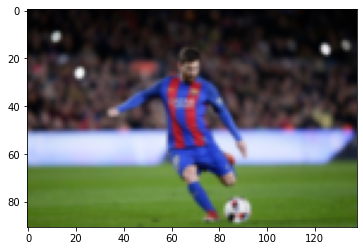

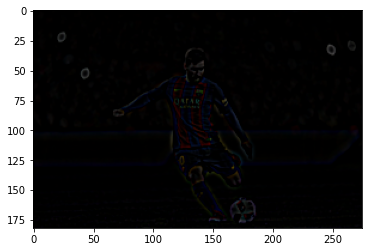

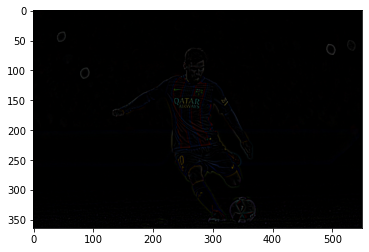

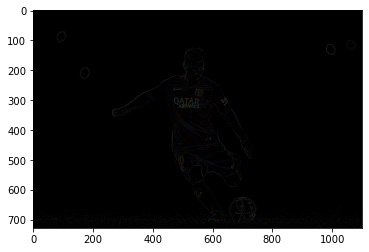

In [ ]:
import cv2
import matplotlib.pyplot as plt
# Load the image
img = cv2.imread('messi.jpg')
lower = img.copy()
 
# Create a Gaussian Pyramid
gaussian_pyr = [lower]
for i in range(3):
    lower = cv2.pyrDown(lower)
    gaussian_pyr.append(lower)
 
# Last level of Gaussian remains same in Laplacian
laplacian_top = gaussian_pyr[3]
plt.imshow(cv2.cvtColor(laplacian_top, cv2.COLOR_BGR2RGB))
plt.show()
# Create a Laplacian Pyramid
laplacian_pyr = [laplacian_top]
for i in range(3,0,-1): #range(start, stop, step)
    size = (gaussian_pyr[i - 1].shape[1], gaussian_pyr[i - 1].shape[0]) # Size(width,height)
    #print(gaussian_pyr[i - 1].shape[1])
    #print(gaussian_pyr[i - 1].shape[0])
    gaussian_expanded = cv2.pyrUp(gaussian_pyr[i], dstsize=size)
    #plt.imshow(cv2.cvtColor(gaussian_expanded, cv2.COLOR_BGR2RGB))
    #plt.show()
    
    laplacian = cv2.subtract(gaussian_pyr[i-1], gaussian_expanded) # Ghép ảnh
    laplacian_pyr.append(laplacian) # add vào mãng
    plt.imshow(cv2.cvtColor(laplacian, cv2.COLOR_BGR2RGB))
    plt.show()
    #cv2.imshow('lap-{}'.format(i-1),laplacian)
    #cv2.waitKey(0)

<span style="color:#00F; font-size:18px; font-weight:bold">Trộn hình ảnh bằng Kim tự tháp</span>
<div align="justify">Một ứng dụng của Pyramids là <b>Image Blending</b>. Ví dụ, trong khâu ghép ảnh, bạn sẽ cần phải xếp chồng hai ảnh lại với nhau, nhưng nó có thể trông không đẹp do sự không liên tục giữa các ảnh. Trong trường hợp đó, trộn ảnh với Kim tự tháp cho phép bạn trộn liền mạch mà không để lại nhiều dữ liệu trong ảnh. Một ví dụ điển hình về điều này là sự pha trộn của hai loại trái cây, Cam và Táo. Các bước làm như sau:</div><br>
1. Tải hai hình ảnh táo và cam <br>
2. Tìm Kim tự tháp Gaussian cho táo và cam (trong ví dụ cụ thể này, số cấp là 6)  <br>
3. Từ Kim tự tháp Gauss, tìm Kim tự tháp Laplacian của chúng <br>
4. Bây giờ hãy ghép nửa trái táo và nửa phải cam vào mỗi cấp của Kim tự tháp Laplacian<br>
5. Cuối cùng từ kim tự tháp hình ảnh khớp này, dựng lại hình ảnh ban đầu.

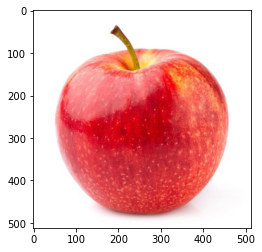

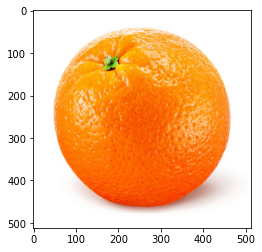

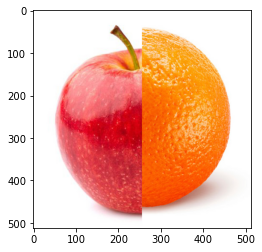

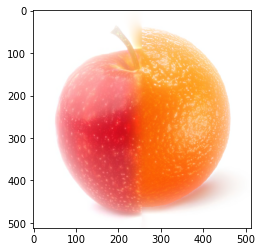

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

apple = cv2.imread('apple.jpg')
orange = cv2.imread('orange.jpg')
#print(apple.shape)
#print(orange.shape)
apple_orange = np.hstack((apple[:, :256], orange[:, 256:])) #Xếp các mảng theo thứ tự theo chiều ngang (theo cột).


# generate Gaussian pyramid for apple
apple_copy = apple.copy()
gp_apple = [apple_copy]
for i in range(6):
    apple_copy = cv2.pyrDown(apple_copy)
    gp_apple.append(apple_copy)


# generate Gaussian pyramid for orange
orange_copy = orange.copy()
gp_orange = [orange_copy]
for i in range(6):
    orange_copy = cv2.pyrDown(orange_copy)
    gp_orange.append(orange_copy)

# generate Laplacian Pyramid for apple
apple_copy = gp_apple[5]
lp_apple = [apple_copy]
for i in range(5, 0, -1):
    gaussian_expanded = cv2.pyrUp(gp_apple[i])
    laplacian = cv2.subtract(gp_apple[i-1], gaussian_expanded)
    lp_apple.append(laplacian)

# generate Laplacian Pyramid for orange
orange_copy = gp_orange[5]
lp_orange = [orange_copy]
for i in range(5, 0, -1):
    gaussian_expanded = cv2.pyrUp(gp_orange[i])
    laplacian = cv2.subtract(gp_orange[i-1], gaussian_expanded)
    lp_orange.append(laplacian)

# Now add left and right halves of images in each level
apple_orange_pyramid = []
n = 0
#a = ("John", "Charles", "Mike")
#b = ("Jenny", "Christy", "Monica")
#x = zip(a, b)
#(('John', 'Jenny'), ('Charles', 'Christy'), ('Mike', 'Monica'))
for apple_lap, orange_lap in zip(lp_apple, lp_orange):
    n += 1
    cols, rows, ch = apple_lap.shape # rows, columns and channels
    #print(apple_lap.shape)
    laplacian = np.hstack((apple_lap[:, 0:int(cols/2)], orange_lap[:, int(cols/2):]))# ghép cols/2
    #plt.imshow(cv2.cvtColor(laplacian, cv2.COLOR_BGR2RGB))
    #plt.show()
    apple_orange_pyramid.append(laplacian)
# now reconstruct
apple_orange_reconstruct = apple_orange_pyramid[0]
for i in range(1, 6): #range(start, stop)
    apple_orange_reconstruct = cv2.pyrUp(apple_orange_reconstruct)
    apple_orange_reconstruct = cv2.add(apple_orange_pyramid[i], apple_orange_reconstruct)

plt.imshow(cv2.cvtColor(apple, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(orange, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(apple_orange, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(apple_orange_reconstruct, cv2.COLOR_BGR2RGB))
plt.show()
#cv2.imshow("apple", apple)
#cv2.imshow("orange", orange)
#cv2.imshow("apple_orange", apple_orange)
#cv2.imshow("apple_orange_reconstruct", apple_orange_reconstruct)
#cv2.waitKey(0)
#cv2.destroyAllWindows()